In [ ]:
#!pip install scikit-image

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip3 install matplotlib

In [61]:
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib.image import imread
import random
import os

from skimage.io import imread
from matplotlib import pyplot
from skimage.transform import resize
import matplotlib as plt
from matplotlib import pyplot as pllt
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, Activation, Flatten

import tensorflow.compat.v2 as tf
tf.keras.preprocessing.image.load_img
from keras.preprocessing import image
import keras.utils as image
from tensorflow.keras.preprocessing import image

In [62]:
input_dir=r'C:\Users\vijay\OneDrive\intellipaat course\pytho intelli\python\ML_projects\Image_classification\cat_VS_dog'

In [63]:
filenames = os.listdir(input_dir)
labels = [x.split(".")[0] for x in filenames]
data = pd.DataFrame({"filename": filenames, "label": labels})
data.head()

,filename,label
0,Cat,Cat
1,dog,dog


In [64]:
input_dir

'C:\\Users\\vijay\\OneDrive\\intellipaat course\\pytho intelli\\python\\ML_projects\\Image_classification\\cat_VS_dog'

In [65]:
import os

files = os.listdir("cat_VS_dog")
print(files)

['Cat', 'dog']


# Define image properties:

In [122]:
batch_size = 32
img_height = 180
img_width = 180
Image_Size=(img_width,img_height)
Image_Channels=3

In [123]:
Train_dataset=tf.keras.utils.image_dataset_from_directory(input_dir,validation_split=0.4,subset='training',seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 1000 files belonging to 2 classes.
Using 600 files for training.


In [124]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
  input_dir,
  validation_split=0.4,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 2 classes.
Using 400 files for validation.


You can find the class names in the class_names attribute on these datasets. These correspond to the directory names in alphabetical order.

In [125]:
import os

files = os.listdir("cat_VS_dog")
print(files)

['Cat', 'dog']


In [126]:
class_names=Train_dataset.class_names
class_names

['Cat', 'dog']

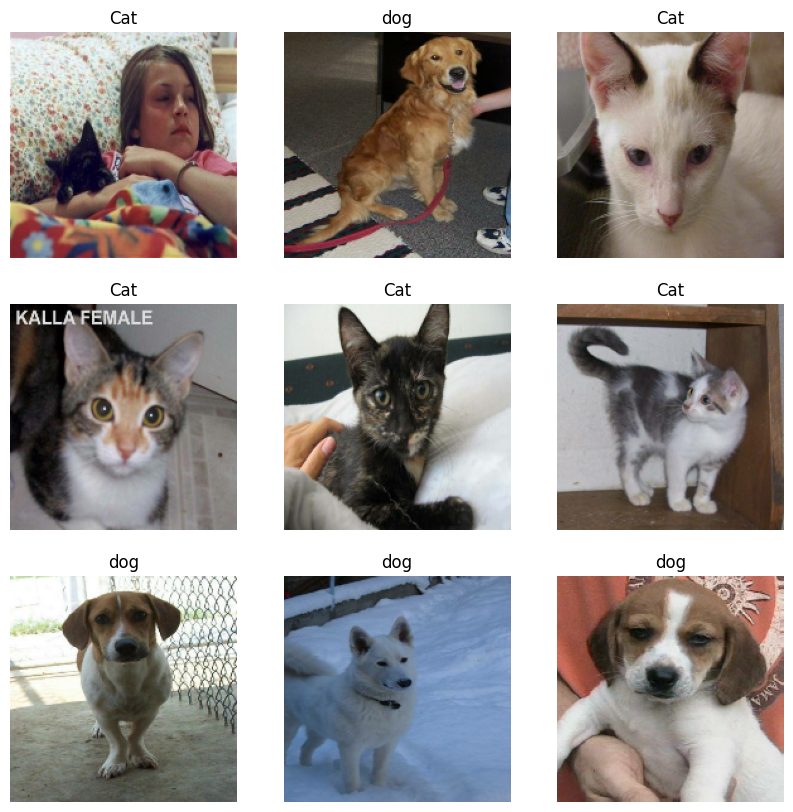

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in Train_dataset.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

You will pass these datasets to the Keras Model.fit method for training later in this tutorial. If you like, you can also manually iterate over the dataset and retrieve batches of images:

In [128]:
for image_batch, labels_batch in Train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 50 images.

You can call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray.

# Configure the dataset for performance
Make sure to use buffered prefetching, so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

* Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

* Dataset.prefetch overlaps data preprocessing and model execution while training.

In [136]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = Train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize the data
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the [0, 1] range by using 

tf.keras.layers.Rescaling:

In [137]:
normalization_layer = layers.Rescaling(1./255)

In [138]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

# A basic Keras model
Create the model

In [139]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(32, 3, padding='same', activation='relu'),
 # layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

The Keras Sequential model consists of three convolution blocks

(tf.keras.layers.Conv2D) with a max pooling layer 

(tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer

(tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu').

This model has not been tuned for high accuracy; the goal of this tutorial is to show a standard approach.

# Compile the model
For this tutorial, choose the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

In [140]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model summary
View all the layers of the network using the Keras Model.summary method:

In [144]:
model.summary()

# Train the model
Train the model for 10 epochs with the Keras Model.fit method:

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

# Visualize training results
Create plots of the loss and accuracy on the training and validation sets:

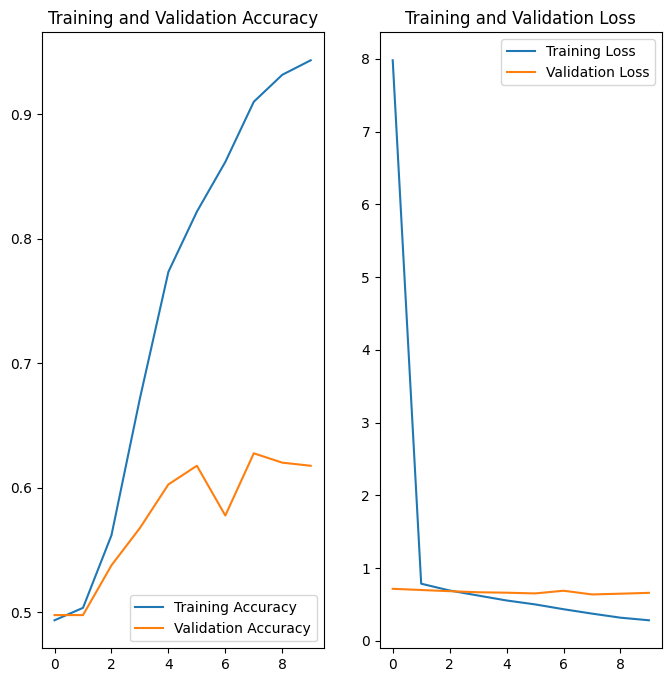

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 60% accuracy on the validation set.

# Data augmentation
Image augmentation is a technique that is used to artificially expand the data-set. This is helpful when we are given a data-set with very few data samples.

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

You will implement data augmentation using the following Keras preprocessing layers: tf.keras.layers.RandomFlip, tf.keras.layers.RandomRotation, and tf.keras.layers.RandomZoom. These can be included inside your model like other layers, and run on the GPU.

In [81]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Visualize a few augmented examples by applying data augmentation to the same image several times:

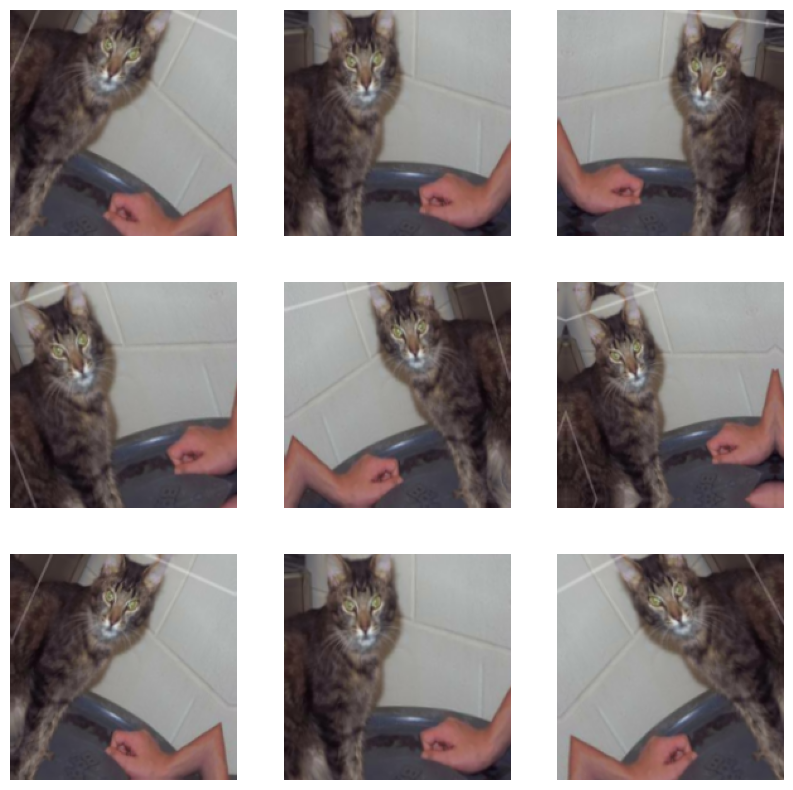

In [82]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

You will add data augmentation to your model before training in the next step.

# Dropout
Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Create a new neural network with tf.keras.layers.Dropout before training it using the augmented images:

In [83]:
Train_dataset=tf.keras.utils.image_dataset_from_directory(input_dir,validation_split=0.4,subset='training',seed=123,image_size=(img_height,img_width),batch_size=25)
val_dataset = tf.keras.utils.image_dataset_from_directory(
  input_dir,
  validation_split=0.4,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=25)

Found 1000 files belonging to 2 classes.
Using 600 files for training.
Found 1000 files belonging to 2 classes.
Using 400 files for validation.


In [84]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
 # layers.Conv2D(32, 3, padding='same', activation='relu'),
 # layers.MaxPooling2D(),
 # layers.Conv2D(64, 3, padding='same', activation='relu'),
 # layers.MaxPooling2D(),
 # layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])



# Compile and train the model:

In [85]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 129600)            0         
                                                                 
 dense_7 (Dense)             (None, 128)               16588928  
                                                      

In [86]:
epochs =15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
12/12 [==============================] - 9s 633ms/step - loss: 5.1028 - accuracy: 0.5050 - val_loss: 1.3359 - val_accuracy: 0.5000
Epoch 2/15
12/12 [==============================] - 8s 712ms/step - loss: 0.8664 - accuracy: 0.5283 - val_loss: 0.7526 - val_accuracy: 0.5550
Epoch 3/15
12/12 [==============================] - 9s 789ms/step - loss: 0.6866 - accuracy: 0.5600 - val_loss: 0.6860 - val_accuracy: 0.5850
Epoch 4/15
12/12 [==============================] - 10s 803ms/step - loss: 0.6591 - accuracy: 0.6333 - val_loss: 0.6652 - val_accuracy: 0.6000
Epoch 5/15
12/12 [==============================] - 9s 791ms/step - loss: 0.6394 - accuracy: 0.6333 - val_loss: 0.6517 - val_accuracy: 0.5950
Epoch 6/15
12/12 [==============================] - 10s 802ms/step - loss: 0.6291 - accuracy: 0.6550 - val_loss: 0.6526 - val_accuracy: 0.6325
Epoch 7/15
12/12 [==============================] - 11s 947ms/step - loss: 0.6301 - accuracy: 0.6700 - val_loss: 0.6692 - val_accuracy: 0.6125
Epo

# Visualize training results
After applying data augmentation and tf.keras.layers.Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned:

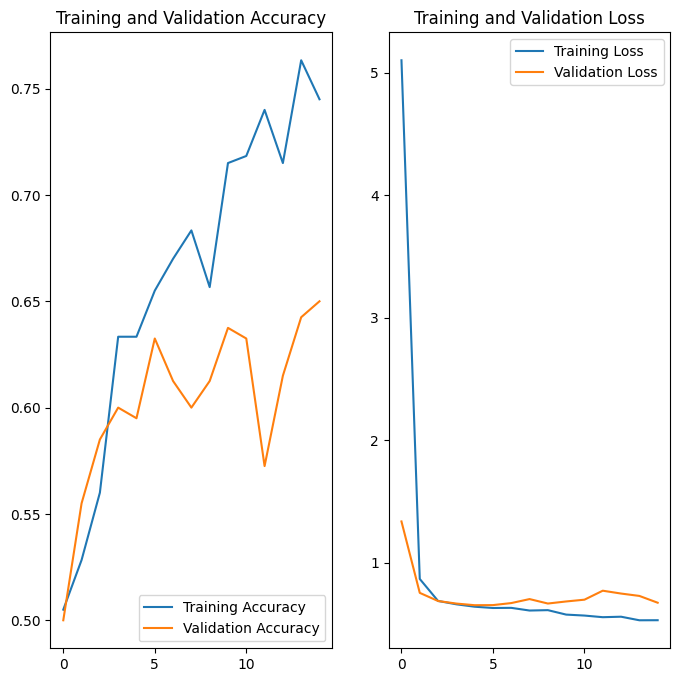

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predict on new data
Use your model to classify an image that wasn't included in the training or validation sets.

In [91]:
from PIL import Image
image = Image.open(r'C:\Users\vijay\OneDrive\intellipaat course\pytho intelli\python\ML_projects\Image_classification\cat_VS_dog\Cat\cat.338.jpg')
 
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

JPEG
(499, 373)
RGB


In [101]:
# Import the necessary libraries
from PIL import Image
from numpy import asarray

import tensorflow.compat.v2 as tf
tf.keras.preprocessing.image.load_img
from keras.preprocessing import image
import keras.utils as image
from tensorflow.keras.preprocessing import image
 
#load the image and convert into
# numpy array
image1 = Image.open(r'C:\Users\vijay\OneDrive\intellipaat course\pytho intelli\python\ML_projects\Image_classification\cat_VS_dog\Cat\cat.338.jpg')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata1 = asarray(image1)
 
# <class 'numpy.ndarray'>
print(type(numpydata1))
 
#  shape
print(numpydata1.shape)

# data
print(numpydata1)

<class 'numpy.ndarray'>
(373, 499, 3)


# Converting Array to image:

# Getting back the image from converted Numpy Array
Image.fromarray() function helps to get back the image from converted numpy array. We get back the pixels also same after converting back and forth. Hence, this is very much efficient

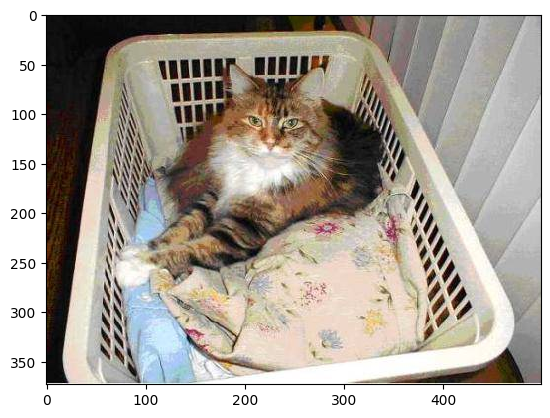

In [35]:
plt.imshow(numpydata, interpolation='nearest')
plt.show()

In [ ]:
classifier.predict_proba

# Image 2:

None
(224, 224)
RGB
<class 'numpy.ndarray'>
(224, 224, 3)
[[[ 2  0  1]
  [ 2  0  1]
  [ 2  0  1]
  ...
  [ 5  1  0]
  [ 5  1  0]
  [ 5  1  0]]

 [[ 2  0  1]
  [ 2  0  1]
  [ 2  0  1]
  ...
  [ 5  1  0]
  [ 6  0  0]
  [ 6  0  0]]

 [[ 2  0  1]
  [ 2  0  1]
  [ 2  0  1]
  ...
  [ 6  0  0]
  [ 9  0  1]
  [ 9  0  1]]

 ...

 [[83 60 44]
  [53 30 14]
  [46 23  7]
  ...
  [35 22 14]
  [30 21 16]
  [20 10  8]]

 [[66 43 27]
  [65 42 26]
  [34 11  0]
  ...
  [42 29 21]
  [28 18 16]
  [16  8  6]]

 [[67 44 28]
  [51 28 12]
  [45 22  6]
  ...
  [59 46 38]
  [16  8  5]
  [15 10  7]]]


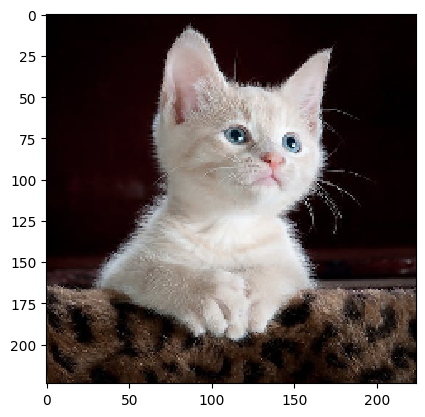

In [36]:
image2=tf.keras.utils.load_img(
    path=r'C:\Users\vijay\OneDrive\intellipaat course\pytho intelli\python\ML_projects\Image_classification\unseen-cat.jpeg',
    grayscale=False,
    color_mode='rgb',
    target_size=(224,224),
    interpolation='nearest',
    keep_aspect_ratio=False
)
image2

# summarize some details about the image
print(image2.format)
print(image2.size)
print(image2.mode)

# PIL images into NumPy arrays
numpydata2 = asarray(image2)
 
# <class 'numpy.ndarray'>
print(type(numpydata2))
 
#  shape
print(numpydata2.shape)

# data
print(numpydata2)

plt.imshow(numpydata2, interpolation='nearest')
plt.show()

None
(224, 224)
RGB
<class 'numpy.ndarray'>
(224, 224, 3)
[[[228 227  59]
  [229 226  61]
  [236 234  61]
  ...
  [ 52  39  22]
  [ 50  37  20]
  [ 46  35  17]]

 [[228 225  62]
  [235 233  60]
  [233 231  50]
  ...
  [ 52  41  23]
  [ 50  38  22]
  [ 45  36  19]]

 [[243 240  75]
  [242 240  59]
  [235 233  50]
  ...
  [ 51  40  22]
  [ 48  36  20]
  [ 43  34  17]]

 ...

 [[ 42  51   4]
  [ 49  61   0]
  [ 32  41   0]
  ...
  [ 43  52  21]
  [ 31  37  11]
  [ 33  38  18]]

 [[ 44  53   6]
  [ 57  69   5]
  [ 50  59  16]
  ...
  [ 49  58  27]
  [ 36  42  16]
  [ 34  39  19]]

 [[ 44  54   4]
  [ 57  69   7]
  [ 41  49   8]
  ...
  [ 44  53  22]
  [ 31  36  13]
  [ 28  32  17]]]


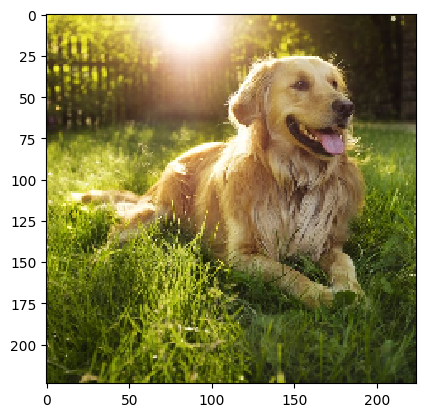

NameError: name 'X_test' is not defined

In [96]:
image3=tf.keras.utils.load_img(
    path=r'C:\Users\vijay\OneDrive\intellipaat course\pytho intelli\python\ML_projects\Image_classification\unseen-dog.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=(224,224),
    interpolation='nearest',
    keep_aspect_ratio=False
)
image3

# summarize some details about the image
print(image3.format)
print(image3.size)
print(image3.mode)

# PIL images into NumPy arrays
numpydata3 = asarray(image3)
 
# <class 'numpy.ndarray'>
print(type(numpydata3))
 
#  shape
print(numpydata3.shape)

# data
print(numpydata3)

plt.imshow(numpydata3, interpolation='nearest')
plt.show()
from sklearn.metrics import r2_score
preds = model.predict(X_test)

JPEG
(600, 880)
RGB
<class 'numpy.ndarray'>
(880, 600, 3)
[[[145 163 165]
  [145 163 165]
  [146 164 166]
  ...
  [168 180 176]
  [168 180 176]
  [168 180 176]]

 [[146 164 166]
  [146 164 166]
  [146 164 166]
  ...
  [168 180 176]
  [168 180 176]
  [168 180 176]]

 [[146 166 167]
  [146 166 167]
  [147 165 167]
  ...
  [169 180 176]
  [169 180 176]
  [169 180 176]]

 ...

 [[  0   4   7]
  [  0   6   9]
  [  0   9  11]
  ...
  [ 93 105 105]
  [129 143 143]
  [149 163 163]]

 [[ 44  59  62]
  [ 34  49  52]
  [ 42  60  62]
  ...
  [184 195 197]
  [183 197 198]
  [166 180 181]]

 [[ 30  45  48]
  [ 82  97 100]
  [128 146 148]
  ...
  [179 190 192]
  [168 182 183]
  [163 177 178]]]


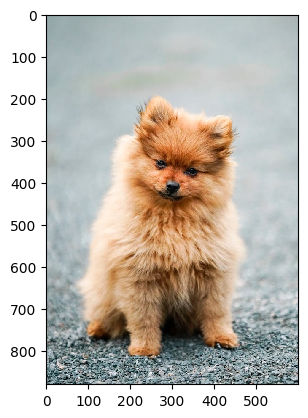

In [38]:
from PIL import Image
image4 = Image.open(r'C:\Users\vijay\OneDrive\intellipaat course\pytho intelli\python\ML_projects\Image_classification\catdog.jpeg')
 
# summarize some details about the image
print(image4.format)
print(image4.size)
print(image4.mode)

# PIL images into NumPy arrays
numpydata4 = asarray(image4)
 
# <class 'numpy.ndarray'>
print(type(numpydata4))
 
#  shape
print(numpydata4.shape)

# data
print(numpydata4)

plt.imshow(numpydata4, interpolation='nearest')
plt.show()

JPEG
(504, 816)
RGB
<class 'numpy.ndarray'>
(816, 504, 3)
[[[231 233 220]
  [229 231 218]
  [228 229 221]
  ...
  [ 40  36  27]
  [ 40  36  27]
  [ 40  36  27]]

 [[230 232 221]
  [229 231 220]
  [227 228 220]
  ...
  [ 39  35  26]
  [ 39  35  26]
  [ 39  35  26]]

 [[230 231 223]
  [228 229 223]
  [226 227 222]
  ...
  [ 37  33  24]
  [ 38  34  25]
  [ 38  34  25]]

 ...

 [[152 143 138]
  [152 143 138]
  [151 142 137]
  ...
  [178 178 180]
  [176 176 178]
  [175 175 177]]

 [[153 144 139]
  [153 144 139]
  [151 142 137]
  ...
  [182 183 187]
  [180 181 185]
  [179 180 184]]

 [[154 145 140]
  [153 144 139]
  [152 143 138]
  ...
  [185 186 190]
  [183 184 188]
  [182 183 187]]]


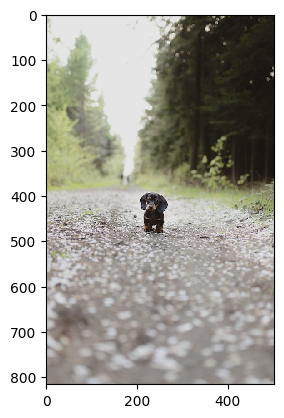

In [39]:
from PIL import Image
image5 = Image.open(r'C:\Users\vijay\OneDrive\intellipaat course\pytho intelli\python\ML_projects\Image_classification\unseen_animal.jpeg')
 
# summarize some details about the image
print(image5.format)
print(image5.size)
print(image5.mode)

# PIL images into NumPy arrays
numpydata5 = asarray(image5)
 
# <class 'numpy.ndarray'>
print(type(numpydata5))
 
#  shape
print(numpydata5.shape)

# data
print(numpydata5)

plt.imshow(numpydata5, interpolation='nearest')
plt.show()

In [59]:
data=[]
labels=[]
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(inpiut_dir,categories)):
        path=os.path.join((inpiut_dir,categories)
                          image=cv.imread(path)
                          image=resize(image,(15,15))
                          data.append(image.flatten())
                          labels.append(category_idx)

labels=np.asarray(labels)
data=np.asarray(data)

SyntaxError: invalid syntax (2371161794.py, line 6)

# Linear Regression:

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,stratify=labels)
from sklearn.preprocessing import StandardScalar
scaler=StandardScaler()
x_train=scaler,fit_transform(x_train)
x_test=scaler,fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [65]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=lr.predict(x_test)
score=accuracy_score(y_test,y_pred)

TypeError: 'module' object is not subscriptable

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
score-accuracy_score(y_pred,y_test)

In [ ]:
rfc=RandomForestClassifier(random_state=42)
parameter_grid={'n_estimators':[200,500],'max_feature':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
cv_rfc=GridSearchcv(estimator=rfc,parameter_grid,cv=5)
cv_rfc.best_params_
rfc1=RandomForestClassifier(random_state=42,max_features='auto',nestimator=200,max_depth=8,criterion='gini')
rfc1.fit(x_train,y_train)
pred=rfc1.predict(x_test)
print('Accuracy for RandomForest on data: ',accuracy_score(pred,y_test))

In [ ]:
pd.DataFrame({'Actual_Value',y_test,'Predicted':pred})

Note - We have trained 1000 images of cats and dogs. Increase in sample image will lead to increase in accuracy.

# -------------------Completed--------------------